# Introduction
***
Notebook **#2-ensemble_modelling_daun_singkong_eksperimen_8** berisi implementasi dari: <br>
- Performa dari single classifier tanpa menggunakan ensemble method terhadap dataset Daun Singkong LBP
- Single classifier yang diimplementasikan yaitu sesuai dari paper rujukan (SVM, LogReg, Decision Tree, dan Naive Bayes)


# Import Libraries

In [1]:
import pandas as pd
import numpy as np

# sklearn for utilization
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, precision_score, fbeta_score
from sklearn.model_selection import StratifiedKFold

# modelling for ensemble method
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# visualization purpose
import matplotlib.pyplot as plt

# utils
import pickle

#
from models.model_ensembles import EnsembleStacking

# Load Data After Preprocessing

In [2]:
dataset_daun_singkong_after_preprocessing = pickle.load(open('../dataset/data_daun_singkong_after_preprocessing.pkl', 'rb'))
X_train = dataset_daun_singkong_after_preprocessing['training']['X']
y_train = dataset_daun_singkong_after_preprocessing['training']['y']
X_test = dataset_daun_singkong_after_preprocessing['testing']['X']
y_test = dataset_daun_singkong_after_preprocessing['testing']['y']

In [3]:
# sampling data
# X_train = X_train[:5000]
# X_test = X_test[:5000]
# y_train = y_train[:5000]
# y_test = y_train[:5000]

# Defining Global Functions

In [4]:
def print_model_experiment_results(name_of_scenario, y_test, y_pred):
    print('\t\t' + '='*30)
    print('\t\tHASIl UJI COBA {}'.format(name_of_scenario.upper()))
    print('\t\t' + '='*30)
    print("\tAkurasi Score: ", accuracy_score(y_test, y_pred))
    print("\tMacro Recall Score: ", recall_score(y_test, y_pred, average='macro'))
    print("\tMacro Precision Score: ", precision_score(y_test, y_pred, average='macro'))
    print("\tMacro F1-score Score: ", fbeta_score(y_test, y_pred, beta=1, average='macro'))
    print("\tMacro F2-score Score: ", fbeta_score(y_test, y_pred, beta=2, average='macro'))
    print("\tMacro F0.5-score Score: ", fbeta_score(y_test, y_pred, beta=0.5, average='macro'))
    
    print()
    print()
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    plt.figure(figsize=(14,8))
    disp.plot()
    plt.show()

# Modelling Single Classifiers

## SVM

		HASIl UJI COBA SVM SINGLE CLASSIFIER
	Akurasi Score:  0.6341121495327103
	Macro Recall Score:  0.24217656041606048
	Macro Precision Score:  0.6729647898124899
	Macro F1-score Score:  0.2259486648639509
	Macro F2-score Score:  0.2303355068388298
	Macro F0.5-score Score:  0.25212582859785077


              precision    recall  f1-score   support

           0       0.67      0.01      0.01       326
           1       0.57      0.05      0.09       657
           2       1.00      0.00      0.00       716
           3       0.64      0.99      0.78      3948
           4       0.49      0.16      0.24       773

    accuracy                           0.63      6420
   macro avg       0.67      0.24      0.23      6420
weighted avg       0.66      0.63      0.52      6420



<Figure size 1008x576 with 0 Axes>

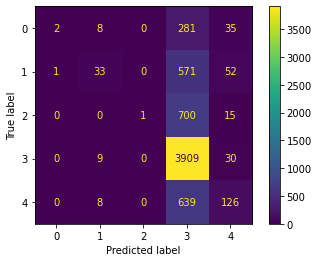

In [5]:
svm = SVC(kernel='poly', random_state=54)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# results
print_model_experiment_results("SVM Single Classifier", y_test, y_pred_svm)

## Logistic Regression

		HASIl UJI COBA LOGISTIC REGRESSION SINGLE CLASSIFIER
	Akurasi Score:  0.6242990654205608
	Macro Recall Score:  0.24007126861529904
	Macro Precision Score:  0.4070231791679279
	Macro F1-score Score:  0.2243971925224489
	Macro F2-score Score:  0.2291276949339207
	Macro F0.5-score Score:  0.24453543433132946


              precision    recall  f1-score   support

           0       0.13      0.01      0.02       326
           1       0.38      0.06      0.10       657
           2       0.50      0.00      0.01       716
           3       0.64      0.97      0.77      3948
           4       0.38      0.15      0.22       773

    accuracy                           0.62      6420
   macro avg       0.41      0.24      0.22      6420
weighted avg       0.54      0.62      0.52      6420



<Figure size 1008x576 with 0 Axes>

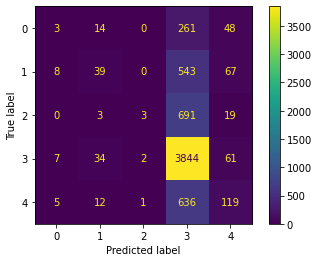

In [6]:
logreg = LogisticRegression(solver='saga', max_iter=400)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# results
print_model_experiment_results("Logistic Regression Single Classifier", y_test, y_pred_logreg)

## Naive Bayes

		HASIl UJI COBA NAIVE BAYES SINGLE CLASSIFIER
	Akurasi Score:  0.6151090342679127
	Macro Recall Score:  0.2005581694447914
	Macro Precision Score:  0.22303615960099749
	Macro F1-score Score:  0.1535452932325383
	Macro F2-score Score:  0.1784886248171474
	Macro F0.5-score Score:  0.13626232608401995


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       326
           1       0.50      0.00      0.01       657
           2       0.00      0.00      0.00       716
           3       0.62      1.00      0.76      3948
           4       0.00      0.00      0.00       773

    accuracy                           0.62      6420
   macro avg       0.22      0.20      0.15      6420
weighted avg       0.43      0.62      0.47      6420



C:\Users\ASUS\anaconda3\envs\S2_computational_intelligence_ensemble_daun_singkong\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\envs\S2_computational_intelligence_ensemble_daun_singkong\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\envs\S2_computational_intelligence_ensemble_daun_singkong\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zer

<Figure size 1008x576 with 0 Axes>

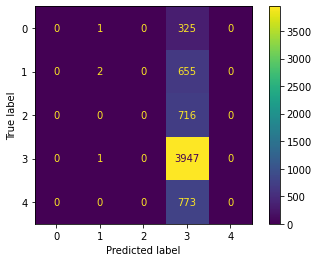

In [7]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)
y_pred_naive_bayes = naive_bayes.predict(X_test)

# results
print_model_experiment_results("Naive Bayes Single Classifier", y_test, y_pred_naive_bayes)

## Decision Tree

		HASIl UJI COBA DECISION TREE SINGLE CLASSIFIER
	Akurasi Score:  0.6205607476635514
	Macro Recall Score:  0.24092334448650235
	Macro Precision Score:  0.2932964013785865
	Macro F1-score Score:  0.21466584693351187
	Macro F2-score Score:  0.22768246125031916
	Macro F0.5-score Score:  0.21183818542655092


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       326
           1       0.17      0.00      0.00       657
           2       0.30      0.01      0.02       716
           3       0.65      0.96      0.77      3948
           4       0.35      0.23      0.28       773

    accuracy                           0.62      6420
   macro avg       0.29      0.24      0.21      6420
weighted avg       0.49      0.62      0.51      6420



C:\Users\ASUS\anaconda3\envs\S2_computational_intelligence_ensemble_daun_singkong\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\envs\S2_computational_intelligence_ensemble_daun_singkong\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\envs\S2_computational_intelligence_ensemble_daun_singkong\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zer

<Figure size 1008x576 with 0 Axes>

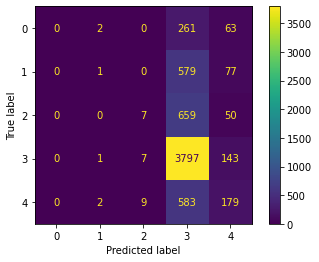

In [8]:
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=3)
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

# results
print_model_experiment_results("Decision Tree Single Classifier", y_test, y_pred_decision_tree)